In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import pandas as pd
import numpy.linalg
from tqdm.notebook import tqdm
from sklearn.metrics.pairwise import euclidean_distances
from dataclasses import dataclass
import networkx as nx

In [2]:
#df = pd.DataFrame(arff.loadarff("2d-10c.arff")[0])
#df = pd.DataFrame(arff.loadarff("3-spiral.arff")[0])
df = pd.DataFrame(arff.loadarff("dense-disk-5000.arff")[0])
#df = pd.DataFrame(arff.loadarff("cluto-t4-8k.arff")[0])
#df = pd.DataFrame(arff.loadarff("2sp2glob.arff")[0])
#df = pd.DataFrame(arff.loadarff("diamond9.arff")[0])
#df["CLASS"] = df["class"]
df["CLASS"] = df["CLASS"].map({x: i for i, x in enumerate(df["CLASS"].unique())})
df

,x,y,CLASS
0,4.41933,-4.364950,0
1,-1.77464,-6.363290,0
2,-7.87681,-5.552910,0
3,-7.67895,-0.044552,0
4,-8.78107,-3.442720,0
...,...,...,...
4995,5.84197,-1.213820,1
4996,2.46677,0.242835,1
4997,-3.58882,0.462759,1
4998,-5.82406,0.864777,1


In [3]:
#X = df[["a0", "a1"]].to_numpy()
X = df[["x", "y"]].to_numpy()

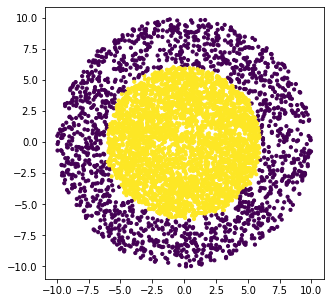

In [4]:
plt.figure(figsize=(5, 5))
#plt.scatter(df["a0"], df["a1"], c=df["CLASS"], s=[10] * len(X))
plt.scatter(df["x"], df["y"], c=df["CLASS"], s=[10] * len(X))

In [5]:
k = 10

In [6]:
distance_matrix = euclidean_distances(X, X)

In [7]:
def build_k_nearest_neighbor_graph(X, k):
    graph = nx.Graph()

    for i in X:
        graph.add_node(i)

    for a in X:
        for b in np.argsort(distance_matrix[a])[1:k + 1]:
            graph.add_edge(a, b, weight=distance_matrix[a][b])

    return graph

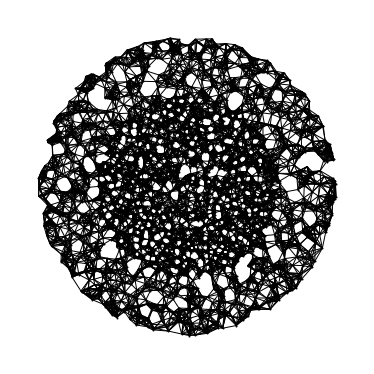

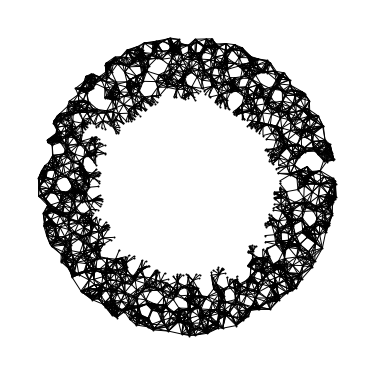

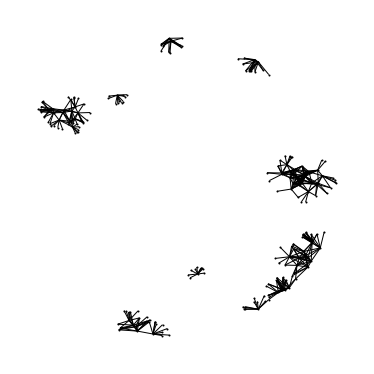

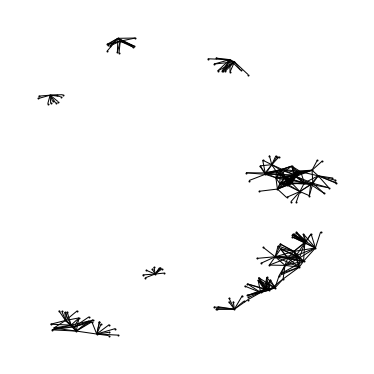

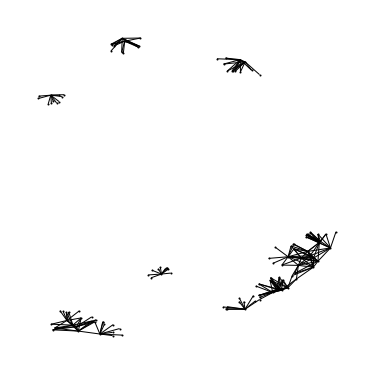

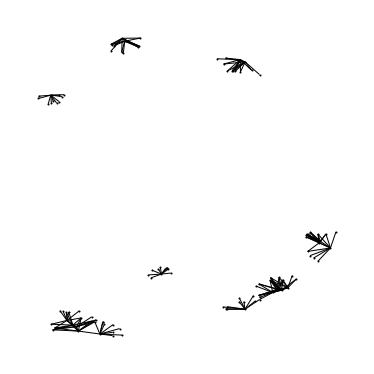

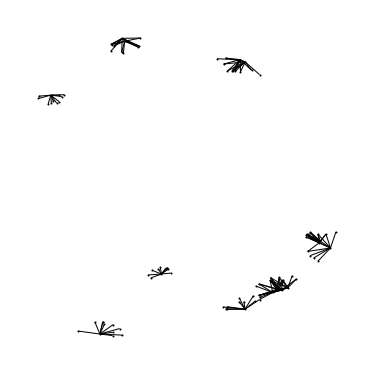

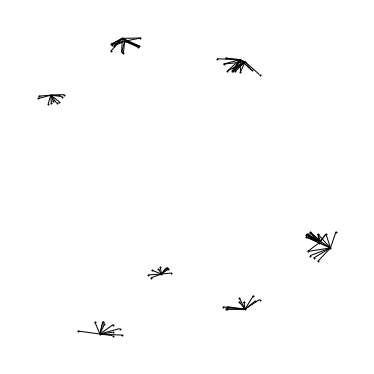

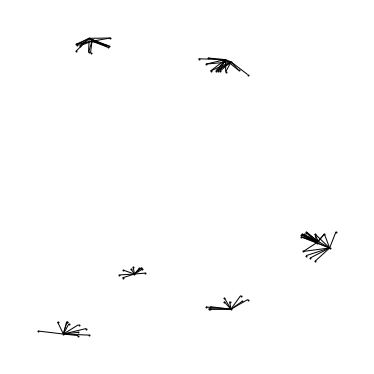

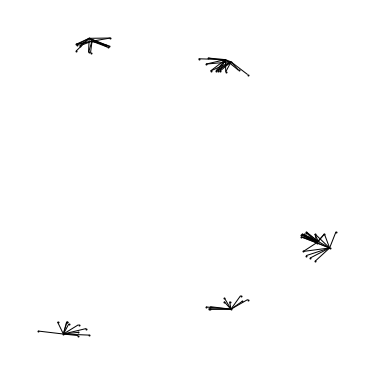

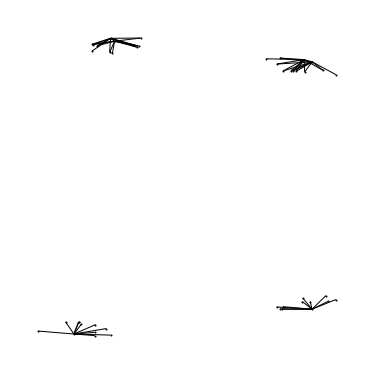

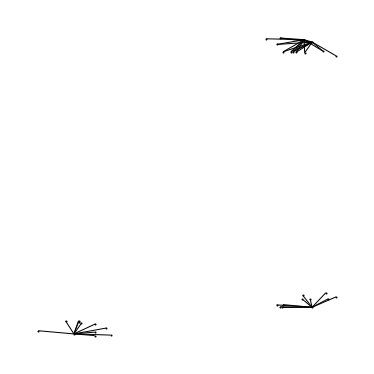

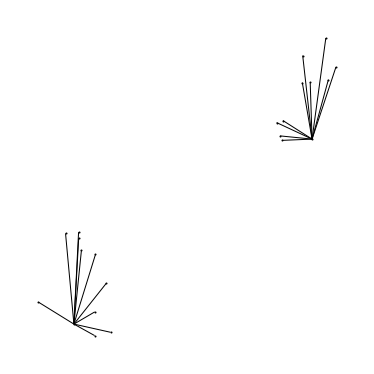

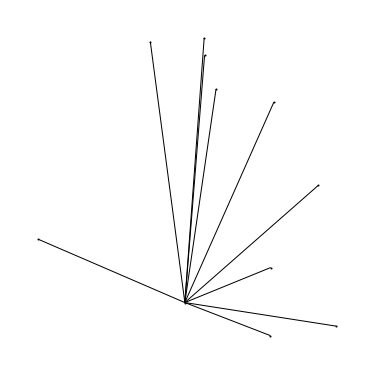

In [8]:
curr = set(range(len(X)))
blacklist = set()

while len(curr) > 0:
    knng = build_k_nearest_neighbor_graph(curr, k=k)

    plt.figure(figsize=(5, 5))
    nx.draw(knng, pos=X, node_size=1, node_color="black")
    plt.show()

    N_remove = len(knng.edges()) // 2
    i = 0
    for a, b, w in sorted(knng.edges(data=True), key=lambda x: x[2].get("weight", 1), reverse=True):
        if i >= N_remove:
            break

        if knng.has_edge(a, b):
            if knng.degree(a) > 1:
                knng.remove_edge(a, b)
                i += 1

        if knng.has_edge(b, a):
            if knng.degree(b) > 1:
                knng.remove_edge(b, a)
                i += 1

    #plt.figure(figsize=(5, 5))
    #nx.draw(knng, pos=X, node_size=1, node_color="black")
    #plt.show()

    subgraphs = sorted(list(nx.connected_components(knng)), key=lambda t: len(t), reverse=True)

    if len(subgraphs) > 0:
        blacklist.update(subgraphs[0])
        curr = set(range(len(X))) - blacklist